In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import requests

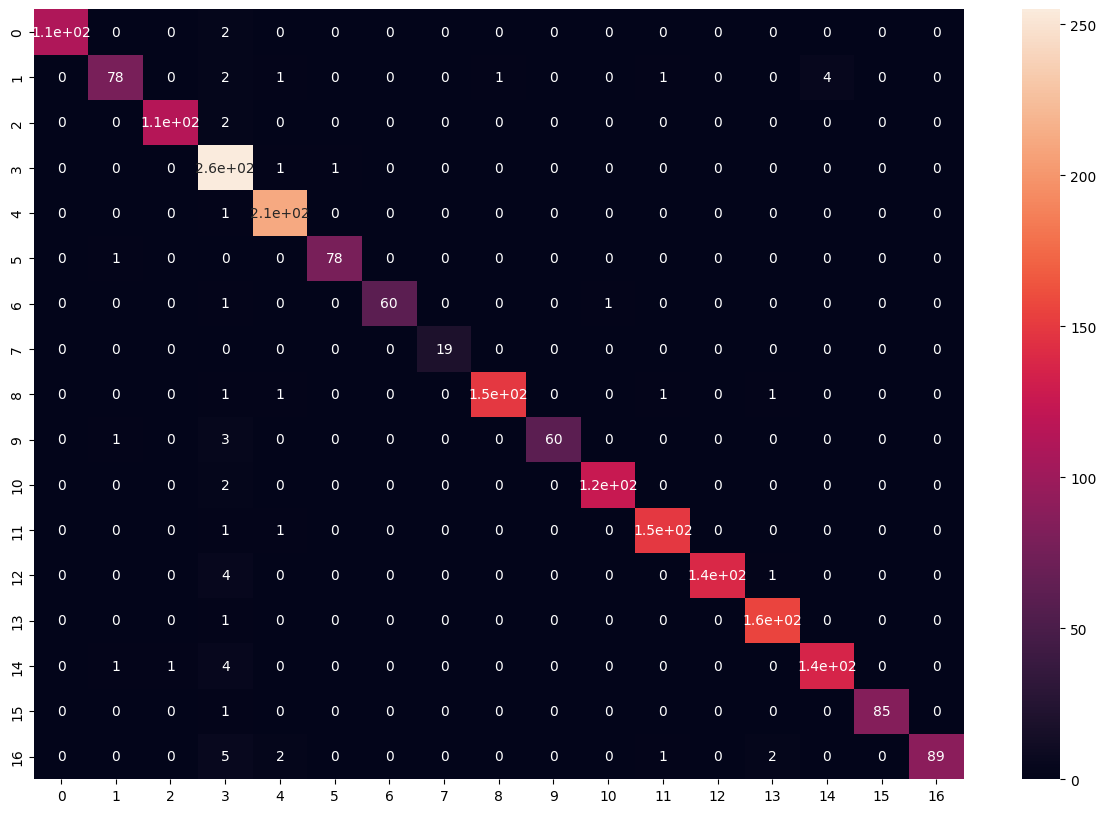

Enter a text to predict the language (or 'q' to quit): Ciao, questo è Sneha
The langauge is in Italian
Enter a text to predict the language (or 'q' to quit): Hi, This is Sneha
The langauge is in English
Enter a text to predict the language (or 'q' to quit): हाय, यह स्नेहा है
The langauge is in Hindi
Enter a text to predict the language (or 'q' to quit): مرحباً ، هذه سنيها
The langauge is in Arabic
Enter a text to predict the language (or 'q' to quit): Olá, aqui é a Sneha
The langauge is in Portugeese
Enter a text to predict the language (or 'q' to quit): Salut, c'est Sneha
The langauge is in French
Enter a text to predict the language (or 'q' to quit): ஹாய், இது சினேகா
The langauge is in Tamil
Enter a text to predict the language (or 'q' to quit): q


In [3]:
warnings.simplefilter("ignore")
def load_dataset(dataset_file):
    response = requests.get(dataset_file)
    data = pd.read_csv(dataset_file)
    return data

# Usage example:
dataset_file = "https://drive.google.com/uc?id=1duiF5y1PS0krO_dLm2X_NaMICYcCDGgR"
data = load_dataset(dataset_file)
# value count for each language
data["Language"].value_counts()
# separating the independent and dependant features
X = data["Text"]
y = data["Language"]
# converting categorical variables to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
# creating a list for appending the preprocessed text
data_list = []
# iterating through all the text
for text in X:
    # removing the symbols and numbers
    text = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', text)
    text = re.sub(r'[[]]', ' ', text)
    # converting the text to lower case
    text = text.lower()
    # appending to data_list
    data_list.append(text)
# creating bag of words using countvectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data_list).toarray()
#train test splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
#model creation and prediction
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)
# prediction 
y_pred = model.predict(x_test)
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
# visualising the confusion matrix
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()
# function for predicting language
def predict(text):
    x = cv.transform([text]).toarray()
    lang = model.predict(x)
    lang = le.inverse_transform(lang)
    print("The langauge is in",lang[0])
while True:
      text = input("Enter a text to predict the language (or 'q' to quit): ")
      if text.lower() == "q":
          break
      predict(text)